<a href="https://colab.research.google.com/github/Zhan5ik/ai-student-coach/blob/main/notebooks/student_risk_decision_support.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import zipfile
import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
urllib.request.urlretrieve(url, "student.zip")

with zipfile.ZipFile("student.zip", "r") as zip_ref:
    zip_ref.extractall()

df = pd.read_csv("student-mat.csv", sep=";")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
df.shape

(395, 33)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df['at_risk'] = (df['G3'] < 10).astype(int)

df['at_risk'].value_counts()

,count
at_risk,
0,265
1,130


In [6]:
import pandas as pd
import zipfile
import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
urllib.request.urlretrieve(url, "student.zip")

with zipfile.ZipFile("student.zip", "r") as zip_ref:
    zip_ref.extractall()

df = pd.read_csv("student-mat.csv", sep=";")

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df['at_risk'] = (df['G3'] < 10).astype(int)

df['at_risk'].value_counts()


,count
at_risk,
0,265
1,130


In [8]:
features = [
    'studytime',
    'failures',
    'absences',
    'schoolsup',
    'famsup',
    'internet',
    'health',
    'Dalc',
    'Walc',
    'freetime',
    'goout'
]

X = df[features]
y = df['at_risk']


In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [12]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.95      0.81        63
           1       0.79      0.31      0.44        36

    accuracy                           0.72        99
   macro avg       0.75      0.63      0.63        99
weighted avg       0.73      0.72      0.68        99



In [13]:
model = LogisticRegression(
    max_iter=1000,
    class_weight={0: 1, 1: 2}
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.92      0.84        63
           1       0.79      0.53      0.63        36

    accuracy                           0.78        99
   macro avg       0.78      0.72      0.74        99
weighted avg       0.78      0.78      0.77        99



In [14]:
!pip install shap


In [15]:
import shap

explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)


In [16]:
import shap
import numpy as np

background = X_train.sample(50, random_state=42)

explainer = shap.KernelExplainer(
    model.predict_proba,
    background
)

shap_values = explainer.shap_values(X_test[:50])


  0%|          | 0/50 [00:00<?, ?it/s]

In [17]:
type(shap_values), len(shap_values)


(numpy.ndarray, 50)

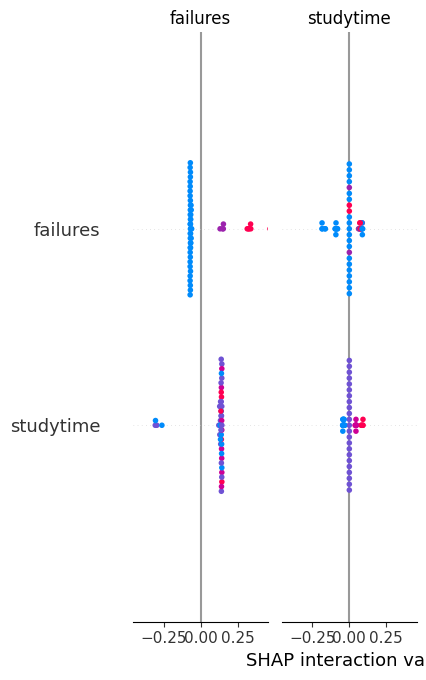

In [18]:
shap.summary_plot(
    shap_values,
    X_test.iloc[:50],
    feature_names=X_test.columns
)


In [19]:
student = X_test.iloc[[0]]
student

,studytime,failures,absences,health,Dalc,Walc,freetime,goout,schoolsup_yes,famsup_yes,internet_yes
78,1,3,2,3,1,1,5,1,True,True,True


In [20]:
pred = model.predict(student)[0]
prob = model.predict_proba(student)[0][1]

print("At risk:", pred)
print("Risk probability:", round(prob, 2))

At risk: 1
Risk probability: 0.88


In [21]:
shap_values_student = explainer(student)

  0%|          | 0/1 [00:00<?, ?it/s]

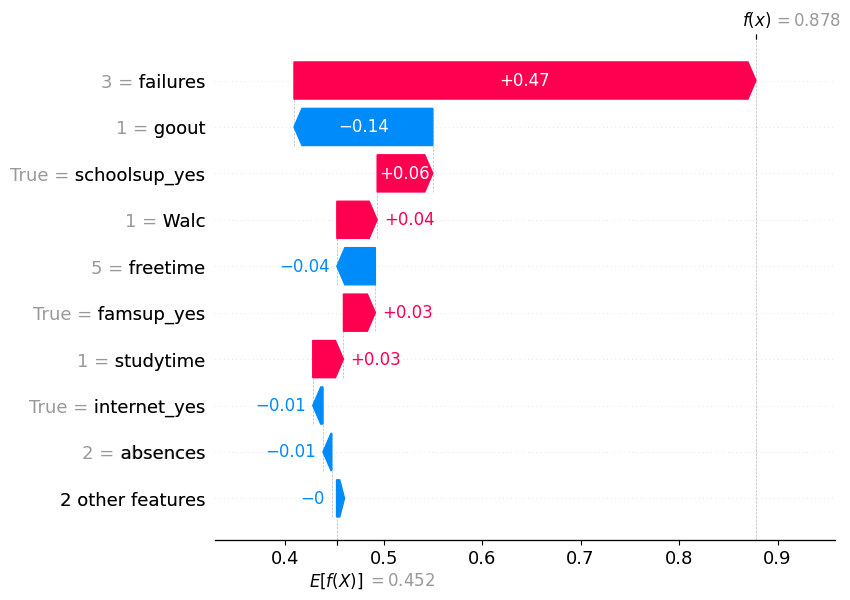

In [22]:
shap.plots.waterfall(shap_values_student[0, :, 1])

In [23]:
def generate_recommendations(shap_row, feature_names):
    recs = []
    for value, feature in zip(shap_row, feature_names):
        if feature == 'failures' and value > 0:
            recs.append("High number of past failures — academic counseling recommended.")
        if feature == 'studytime' and value > 0:
            recs.append("Low study time — suggest structured study schedule.")
    return recs


In [24]:
recs = generate_recommendations(
    shap_values_student.values[0, :, 1],
    student.columns
)

recs


['Low study time — suggest structured study schedule.',
 'High number of past failures — academic counseling recommended.']

In [25]:
base_student = student.copy()

In [26]:
def predict_risk(df_row):
    prob = model.predict_proba(df_row)[0][1]
    return round(prob, 3)

In [27]:
base_risk = predict_risk(base_student)

In [28]:
what_if_scenarios = {
    "Increase study time": {"studytime": base_student["studytime"].values[0] + 2},
    "Reduce failures": {"failures": max(0, base_student["failures"].values[0] - 1)},
    "Less going out": {"goout": max(1, base_student["goout"].values[0] - 2)},
    "Improve health": {"health": min(5, base_student["health"].values[0] + 2)}
}

results = []

In [29]:
for scenario, changes in what_if_scenarios.items():
    modified = base_student.copy()

    for feature, new_value in changes.items():
        modified[feature] = new_value

    new_risk = predict_risk(modified)

    results.append({
        "Scenario": scenario,
        "Original risk": base_risk,
        "New risk": new_risk,
        "Risk change": round(new_risk - base_risk, 3)
    })

what_if_df = pd.DataFrame(results)
what_if_df

,Scenario,Original risk,New risk,Risk change
0,Increase study time,0.878,0.825,-0.053
1,Reduce failures,0.878,0.735,-0.143
2,Less going out,0.878,0.878,0.000
3,Improve health,0.878,0.887,0.009


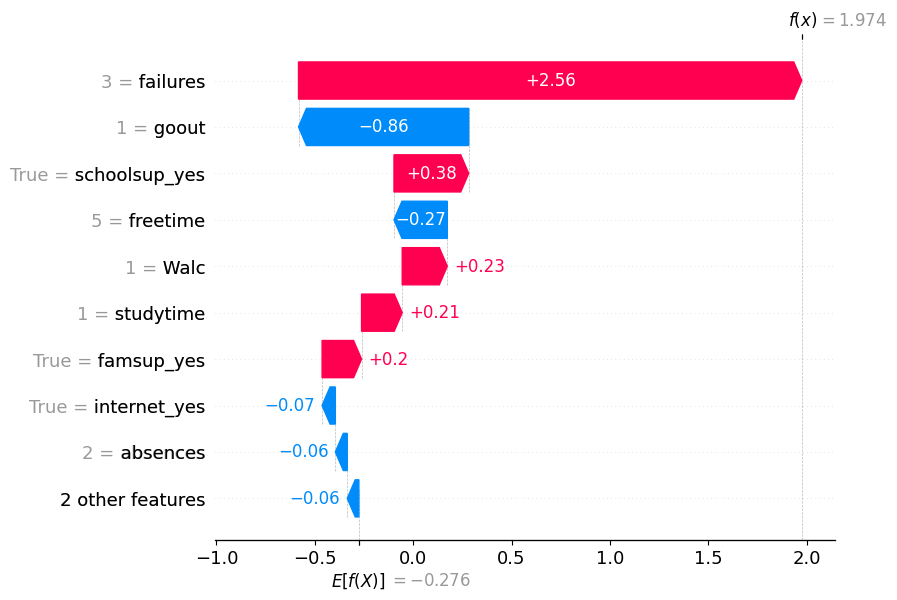

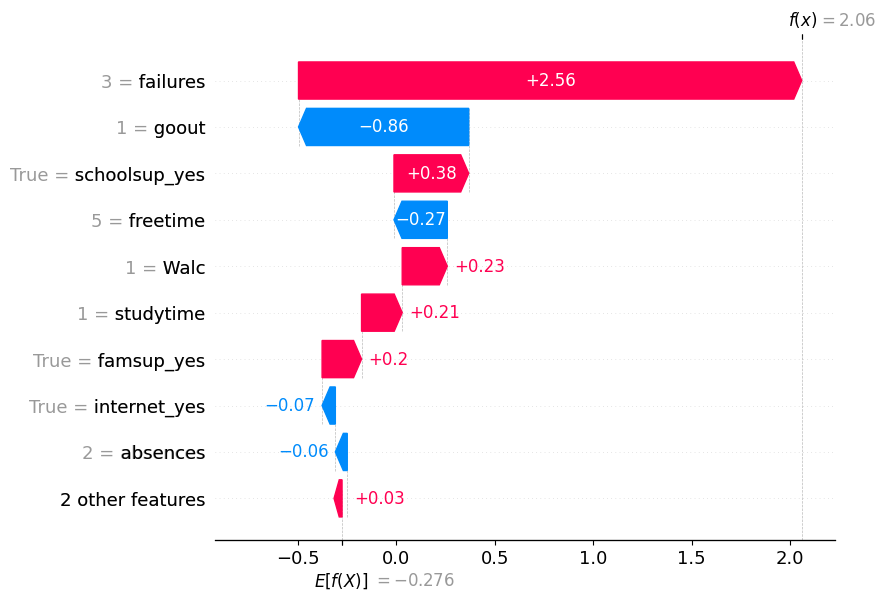

In [30]:
explainer = shap.Explainer(model, X_test)

shap_base = explainer(base_student)
shap_modified = explainer(modified)

shap.plots.waterfall(shap_base[0])
shap.plots.waterfall(shap_modified[0])

In [31]:
def run_batch_what_if(
    model,
    base_student,
    scenarios,
    feature_columns
):

    original_risk = model.predict_proba(
        base_student[feature_columns]
    )[0, 1]

    results = []

    for scenario_name, changes in scenarios.items():
        modified_student = base_student.copy()

        for feature, new_value in changes.items():
            modified_student[feature] = new_value

        new_risk = model.predict_proba(
            modified_student[feature_columns]
        )[0, 1]

        results.append({
            "Scenario": scenario_name,
            "Original risk": round(original_risk, 3),
            "New risk": round(new_risk, 3),
            "Risk change": round(new_risk - original_risk, 3)
        })

    return pd.DataFrame(results)

In [32]:
batch_results = run_batch_what_if(
    model=model,
    base_student=base_student,
    scenarios=what_if_scenarios,
    feature_columns=X.columns
)

batch_results

,Scenario,Original risk,New risk,Risk change
0,Increase study time,0.878,0.825,-0.053
1,Reduce failures,0.878,0.735,-0.143
2,Less going out,0.878,0.878,0.000
3,Improve health,0.878,0.887,0.009


In [33]:
probs = model.predict_proba(X)[:, 1]

batch_results = X.copy()
batch_results["risk_probability"] = probs
batch_results["at_risk"] = (probs > 0.5).astype(int)


In [34]:
shap_values = explainer(X)
shap_at_risk = shap_values.values

In [35]:
def decision_logic(shap_row, features, prob):
    actions = []

    if prob > 0.75:
        actions.append("URGENT academic intervention")

    for value, feature in zip(shap_row, features):
        if feature == "failures" and value > 0:
            actions.append("Academic counseling")
        if feature == "studytime" and value > 0:
            actions.append("Structured study plan")
        if feature == "absences" and value > 0:
            actions.append("Attendance monitoring")
        if feature == "goout" and value > 0:
            actions.append("Lifestyle balance coaching")

    return list(set(actions))

In [36]:
batch_results["recommended_actions"] = [
    decision_logic(
        shap_at_risk[i],
        X.columns,
        batch_results.iloc[i]["risk_probability"]
    )
    for i in range(len(X))
]

In [37]:
priority_students = (
    batch_results
    .sort_values("risk_probability", ascending=False)
    .head(20)
)

priority_students[[
    "risk_probability",
    "recommended_actions"
]]

,risk_probability,recommended_actions
157,0.970273,"[Lifestyle balance coaching, Academic counseli..."
144,0.966333,"[Lifestyle balance coaching, URGENT academic i..."
18,0.961257,"[Lifestyle balance coaching, Academic counseli..."
153,0.948820,"[Lifestyle balance coaching, URGENT academic i..."
173,0.948010,"[Lifestyle balance coaching, URGENT academic i..."
247,0.937672,"[Lifestyle balance coaching, Academic counseli..."
270,0.932504,"[Attendance monitoring, Lifestyle balance coac..."
206,0.927110,"[Attendance monitoring, Lifestyle balance coac..."
164,0.924929,"[Lifestyle balance coaching, URGENT academic i..."
127,0.917794,"[URGENT academic intervention, Academic counse..."


In [38]:
def decision_logic(shap_row, features, prob):
    actions = []
    priority = "LOW"

    if prob >= 0.85:
        priority = "CRITICAL"
    elif prob >= 0.7:
        priority = "HIGH"
    elif prob >= 0.55:
        priority = "MEDIUM"

    for value, feature in zip(shap_row, features):
        if value <= 0:
            continue

        if feature == "failures":
            actions.append("Academic counseling")

        elif feature == "studytime":
            actions.append("Structured study plan")

        elif feature == "absences":
            actions.append("Attendance monitoring")

        elif feature == "goout":
            actions.append("Lifestyle balance coaching")

    if priority == "CRITICAL":
        actions.append("URGENT academic intervention")

    return {
        "priority": priority,
        "actions": list(set(actions))
    }

In [39]:
batch_results["decision"] = [
    decision_logic(
        shap_at_risk[i],
        X.columns,
        batch_results.iloc[i]["risk_probability"]
    )
    for i in range(len(X))
]

In [40]:
i = 19
print("Risk probability:", batch_results.iloc[i]["risk_probability"])
print("At risk:", batch_results.iloc[i]["at_risk"])
print("Recommended actions:", batch_results.iloc[i]["recommended_actions"])


Risk probability: 0.3535805964118391
At risk: 0
Recommended actions: ['Lifestyle balance coaching', 'Structured study plan']


In [41]:
i = 59
print("Risk probability:", batch_results.iloc[i]["risk_probability"])
print("At risk:", batch_results.iloc[i]["at_risk"])
print("Recommended actions:", batch_results.iloc[i]["recommended_actions"])


Risk probability: 0.48390815862065434
At risk: 0
Recommended actions: ['Lifestyle balance coaching']


In [42]:
i = 0
print("Risk probability:", batch_results.iloc[i]["risk_probability"])
print("At risk:", batch_results.iloc[i]["at_risk"])
print("Recommended actions:", batch_results.iloc[i]["recommended_actions"])


Risk probability: 0.6219318179257249
At risk: 1
Recommended actions: ['Attendance monitoring', 'Lifestyle balance coaching']


In [43]:
shap_row = shap_at_risk[i]

for feature, value in zip(X.columns, shap_row):
    if abs(value) > 0.05:
        print(feature, round(value, 3))


failures -0.309
Walc 0.229
goout 0.494
schoolsup_yes 0.38
famsup_yes -0.322
internet_yes 0.303


In [44]:
i = 23
print("Risk probability:", batch_results.iloc[i]["risk_probability"])
print("At risk:", batch_results.iloc[i]["at_risk"])
print("Recommended actions:", batch_results.iloc[i]["recommended_actions"])


Risk probability: 0.37443008254984855
At risk: 0
Recommended actions: ['Lifestyle balance coaching']


In [45]:
i = 21
print("Risk probability:", batch_results.iloc[i]["risk_probability"])
print("At risk:", batch_results.iloc[i]["at_risk"])
print("Recommended actions:", batch_results.iloc[i]["recommended_actions"])


Risk probability: 0.34150592996549206
At risk: 0
Recommended actions: ['Structured study plan']


In [46]:
i = 22
print("Risk probability:", batch_results.iloc[i]["risk_probability"])
print("At risk:", batch_results.iloc[i]["at_risk"])
print("Recommended actions:", batch_results.iloc[i]["recommended_actions"])


Risk probability: 0.0849535570368409
At risk: 0
Recommended actions: []


In [47]:
i = 25
print("Risk probability:", batch_results.iloc[i]["risk_probability"])
print("At risk:", batch_results.iloc[i]["at_risk"])
print("Recommended actions:", batch_results.iloc[i]["recommended_actions"])


Risk probability: 0.8086077830635136
At risk: 1
Recommended actions: ['Attendance monitoring', 'URGENT academic intervention', 'Structured study plan', 'Academic counseling']


In [48]:
shap_row = shap_at_risk[i]

for feature, value in zip(X.columns, shap_row):
    if abs(value) > 0.05:
        print(feature, round(value, 3))

studytime 0.207
failures 1.602
absences 0.2
health 0.058
Walc -0.195
freetime 0.189
goout -0.412
famsup_yes 0.201
internet_yes -0.067
